# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [39]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [40]:
# Import essential libraries
# Numerical & Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from PIL import Image

# Machine Learning & Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



Load the dataset.

In [41]:
# Load and unzip the dataset

import zipfile
import os

# Path to the zip file
zip_path = 'D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/Dataset_Waste_Segregation.zip'  # change this if your file has a different name

# Destination folder to extract
extract_dir = 'waste_dataset'

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset unzipped successfully.")

✅ Dataset unzipped successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [42]:
import os

def load_dataset(base_dir, target_size=(128, 128), crop_center=False):
    X = []
    y = []
    class_names = sorted(os.listdir(base_dir))  # Ensure consistent label ordering
    class_map = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = load_and_process_image(img_path, target_size, crop_center)
            if img is not None:
                X.append(img)
                y.append(class_map[class_name])

    return np.array(X), np.array(y), class_map


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [43]:
# Get the images and their labels

dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/"
X, y, class_map = load_dataset(dataset_path, crop_center=True)

print(" Loaded images:", X.shape)
print(" Labels:", y.shape)
print(" Class Mapping:", class_map)


✅ Loaded images: (7625, 128, 128, 3)
✅ Labels: (7625,)
📚 Class Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

📊 Class Counts: {'Cardboard': 540, 'Food_Waste': 1000, 'Glass': 750, 'Metal': 1000, 'Other': 1010, 'Paper': 1030, 'Plastic': 2295}


C:\Users\sawak\AppData\Local\Temp\ipykernel_13408\1145060564.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


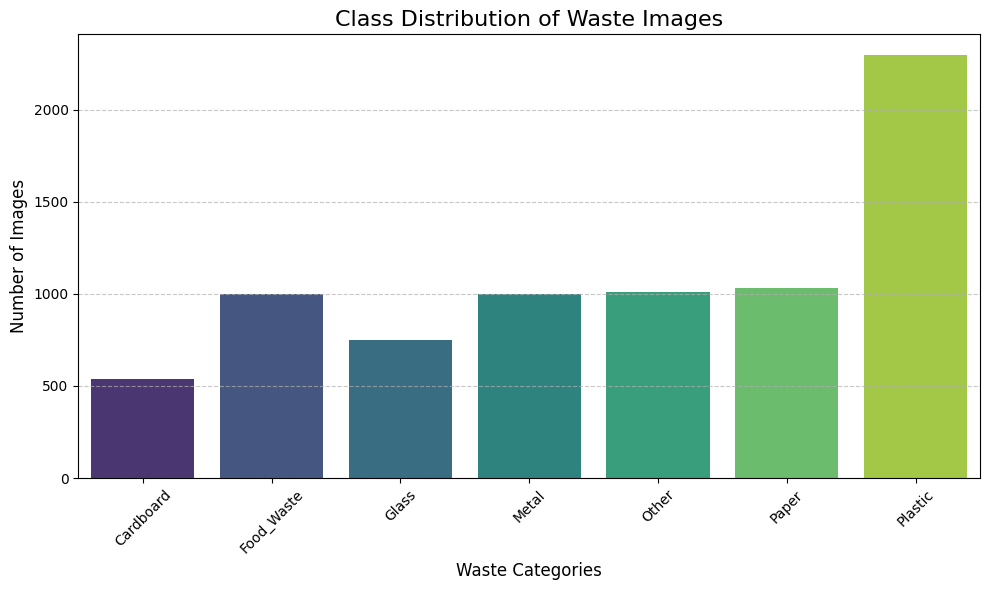

In [44]:
# Visualise Data Distribution
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set your dataset path
dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/"

# Count images in each class
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count

print("📊 Class Counts:", class_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

plt.title("Class Distribution of Waste Images", fontsize=16)
plt.xlabel("Waste Categories", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

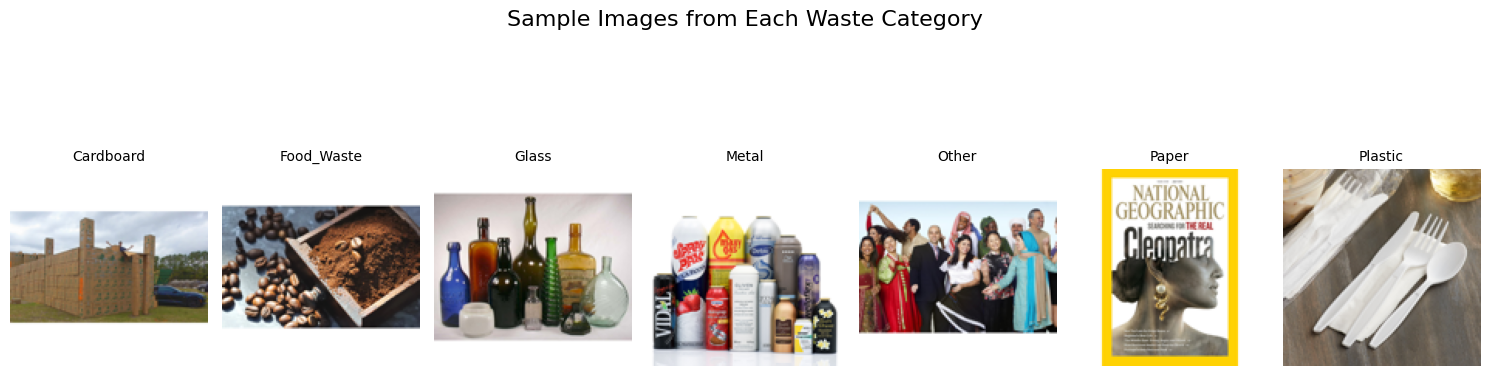

In [45]:
# Visualise Sample Images (across different labels)

import os
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(dataset_path, target_size=(128, 128)):
    class_names = sorted(os.listdir(dataset_path))
    num_classes = len(class_names)

    plt.figure(figsize=(15, 5))

    for i, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        
        # Get the first image from the class folder
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not image_files:
            continue
        
        image_path = os.path.join(class_folder, image_files[0])
        img = Image.open(image_path).convert('RGB')
        img = img.resize(target_size)

        # Plotting
        plt.subplot(1, num_classes, i + 1)
        plt.imshow(img)
        plt.title(class_name, fontsize=10)
        plt.axis('off')

    plt.suptitle("Sample Images from Each Waste Category", fontsize=16)
    plt.tight_layout()
    plt.show()

show_sample_images("D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/")


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [46]:
# Find the smallest and largest image dimensions from the data set
from PIL import Image
import os

def find_image_dimension_extremes(dataset_path):
    min_width = float('inf')
    min_height = float('inf')
    max_width = 0
    max_height = 0

    smallest_img = None
    largest_img = None

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            try:
                with Image.open(img_path) as img:
                    width, height = img.size

                    # Update min
                    if width * height < min_width * min_height:
                        min_width, min_height = width, height
                        smallest_img = img_path

                    # Update max
                    if width * height > max_width * max_height:
                        max_width, max_height = width, height
                        largest_img = img_path

            except Exception as e:
                print(f"❌ Error reading {img_path}: {e}")

    print(f"📏 Smallest image: {min_width} x {min_height} → {smallest_img}")
    print(f"📐 Largest image: {max_width} x {max_height} → {largest_img}")



dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/"
find_image_dimension_extremes(dataset_path)



📏 Smallest image: 256 x 256 → D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/Cardboard\file_1.png
📐 Largest image: 256 x 256 → D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/Cardboard\file_1.png


In [47]:
# Resize the image dimensions

from PIL import Image
import os

def resize_images(input_dir, output_dir, target_size=(128, 128)):
    """
    Resize all images in input_dir and save them to output_dir maintaining folder structure.

    Args:
        input_dir (str): Original dataset folder path.
        output_dir (str): Folder path to save resized images.
        target_size (tuple): Desired (width, height).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    class_names = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

    for class_name in class_names:
        src_folder = os.path.join(input_dir, class_name)
        dest_folder = os.path.join(output_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)

        for img_name in os.listdir(src_folder):
            img_path = os.path.join(src_folder, img_name)
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')  # Ensure 3 channels
                    img = img.resize(target_size, Image.Resampling.LANCZOS)
                    save_path = os.path.join(dest_folder, img_name)
                    img.save(save_path)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    print(f"✅ Resized images saved to {output_dir}")


original_dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data/"
resized_dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data_resized/"
resize_images(original_dataset_path, resized_dataset_path, target_size=(128, 128))



✅ Resized images saved to D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data_resized/


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [51]:
import os

def load_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []

    for label in sorted(os.listdir(base_dir)):  # sorted to maintain consistent label order
        class_dir = os.path.join(base_dir, label)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_paths.append(os.path.join(class_dir, fname))
                    labels.append(label)

    return image_paths, labels

# Set the path to your resized images directory
resized_dataset_path = "D:/Learnings/UpGrad/AI & ML main course/Site material/Deep Learning/Case study/waste_dataset/data_resized/"

image_paths, y_labels = load_image_paths_and_labels(resized_dataset_path)

print(f"✅ Total images: {len(image_paths)}")
print(f"✅ Total labels: {len(y_labels)}")

✅ Total images: 7625
✅ Total labels: 7625


In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Fixed class order
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Label encode
label_encoder = LabelEncoder()
label_encoder.fit(class_names)

y_encoded = label_encoder.transform(y_labels)               # Shape: (7625,)
y_onehot = to_categorical(y_encoded, num_classes=7)         # Shape: (7625, 7)

print("y_encoded shape:", y_encoded.shape)
print("y_onehot shape:", y_onehot.shape)


y_encoded shape: (7625,)
y_onehot shape: (7625, 7)


In [53]:
import numpy as np
from PIL import Image

def load_images(image_paths, target_size=(128, 128)):
    images = []
    for path in image_paths:
        try:
            with Image.open(path) as img:
                img = img.convert("RGB")
                img = img.resize(target_size)
                images.append(np.array(img))
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    return np.array(images)

X = load_images(image_paths)

print("X shape:", X.shape)  # Should be (7625, 128, 128, 3)

X shape: (7625, 128, 128, 3)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [54]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(
    X, y_onehot,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded  # NOT y_onehot
)

print(" Training samples:", len(X_train))
print(" Validation samples:", len(X_val))


 Training samples: 6100
 Validation samples: 1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [55]:
# Build and compile the model
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128, 128, 3), num_classes=7):
    model = models.Sequential()

    # Conv Block 1
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 2
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Conv Block 3
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (softmax for multi-class)
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Build model instance
model = build_cnn_model()

# Summary of the model architecture
model.summary()



C:\Users\sawak\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [56]:
# Training

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,   # stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_waste_classifier.h5', 
    monitor='val_accuracy', 
    save_best_only=True,
    mode='max',
    verbose=1
)

# Training parameters
batch_size = 32
epochs = 30

# Train the model
history = model.fit(
    X_train, y_train_onehot,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val_onehot),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.2643 - loss: 35.4225
Epoch 1: val_accuracy improved from None to 0.31213, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 227ms/step - accuracy: 0.2820 - loss: 9.1812 - val_accuracy: 0.3121 - val_loss: 1.8507
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.3130 - loss: 1.8228
Epoch 2: val_accuracy improved from 0.31213 to 0.31934, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 280ms/step - accuracy: 0.3177 - loss: 1.8173 - val_accuracy: 0.3193 - val_loss: 1.8375
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.3237 - loss: 1.7880
Epoch 3: val_accuracy did not improve from 0.31934
191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 256ms/step - accuracy: 0.3290 - loss: 1.7873 - val_accuracy: 0.3121 - val_loss: 1.8434
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.3245 - loss: 1.7987
Epoch 4: val_accuracy did not improve from 0.31934
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.3233 - loss: 1.8019 - val_accuracy: 0.3141 - val_loss: 1.8309
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.3425 - loss: 1.7515
Epoch 5: val_accuracy improved from 0.31934 to 0.33049, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.3379 - loss: 1.7612 - val_accuracy: 0.3305 - val_loss: 1.8496
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3551 - loss: 1.7306
Epoch 6: val_accuracy did not improve from 0.33049
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 0.3485 - loss: 1.7418 - val_accuracy: 0.3298 - val_loss: 1.8492
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3718 - loss: 1.6858
Epoch 7: val_accuracy improved from 0.33049 to 0.35213, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 0.3702 - loss: 1.6847 - val_accuracy: 0.3521 - val_loss: 1.7951
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.3670 - loss: 1.6794
Epoch 8: val_accuracy did not improve from 0.35213
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step - accuracy: 0.3790 - loss: 1.6628 - val_accuracy: 0.3462 - val_loss: 1.8974
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4341 - loss: 1.5729
Epoch 9: val_accuracy improved from 0.35213 to 0.38230, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 230ms/step - accuracy: 0.4164 - loss: 1.5910 - val_accuracy: 0.3823 - val_loss: 1.9114
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4457 - loss: 1.5219
Epoch 10: val_accuracy improved from 0.38230 to 0.38426, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.4379 - loss: 1.5308 - val_accuracy: 0.3843 - val_loss: 1.9708
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.4727 - loss: 1.4279
Epoch 11: val_accuracy improved from 0.38426 to 0.39869, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.4682 - loss: 1.4481 - val_accuracy: 0.3987 - val_loss: 1.8409
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4728 - loss: 1.4431
Epoch 12: val_accuracy improved from 0.39869 to 0.40721, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 0.4830 - loss: 1.4115 - val_accuracy: 0.4072 - val_loss: 1.8721


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [57]:
# Evaluate on the test set; display suitable metrics
# Evaluate using built-in Keras method
val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")



48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.3521 - loss: 1.7951
Validation Loss: 1.7951
Validation Accuracy: 0.3521


In [58]:
# Predict class probabilities
y_pred_probs = model.predict(X_val)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels back to integer labels
y_true_classes = np.argmax(y_val_onehot, axis=1)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [59]:
from sklearn.metrics import classification_report

# Get class names (in same order as used during training)
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

   Cardboard       0.50      0.04      0.07       108
  Food_Waste       0.39      0.31      0.35       200
       Glass       0.50      0.02      0.04       150
       Metal       0.51      0.11      0.18       200
       Other       0.33      0.10      0.16       202
       Paper       0.25      0.08      0.12       206
     Plastic       0.35      0.89      0.50       459

    accuracy                           0.35      1525
   macro avg       0.41      0.22      0.20      1525
weighted avg       0.39      0.35      0.26      1525



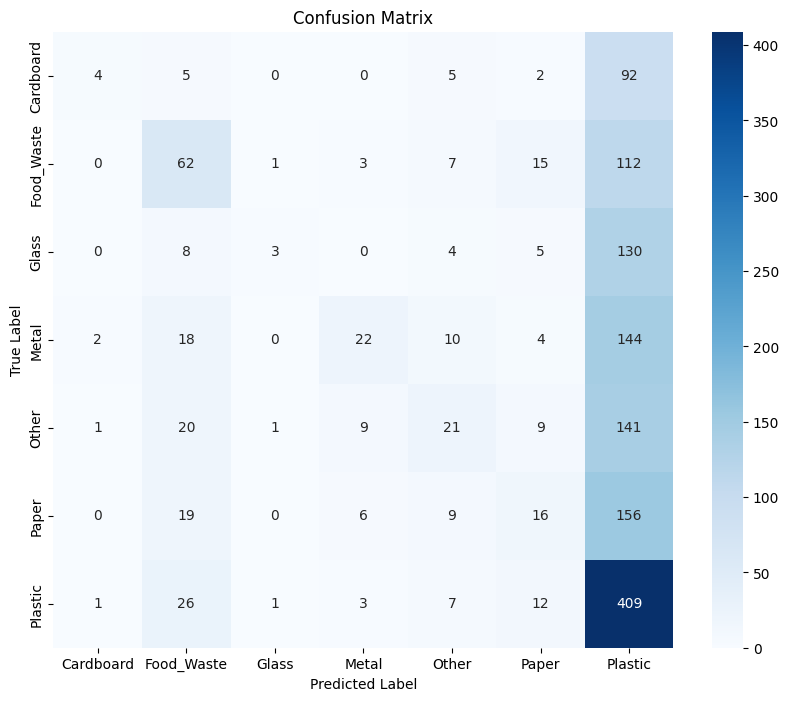

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


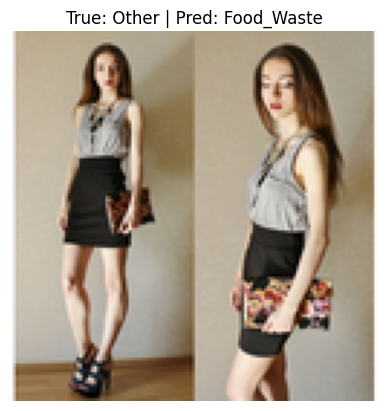

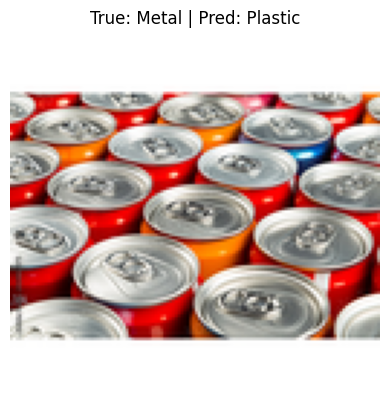

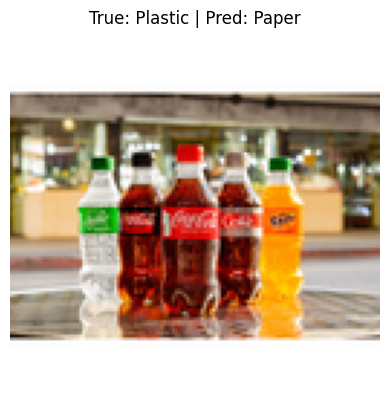

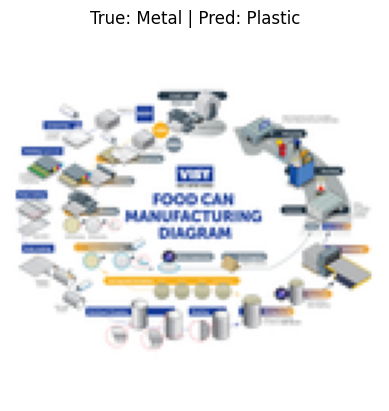

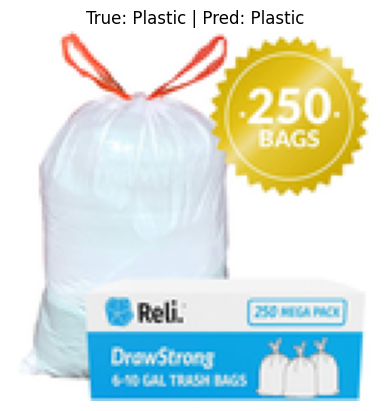

In [61]:
import random

# Show 5 random predictions
indices = random.sample(range(len(X_val)), 5)

for idx in indices:
    plt.imshow(X_val[idx].astype("uint8"))
    plt.axis('off')
    true_label = class_names[y_true_classes[idx]]
    predicted_label = class_names[y_pred_classes[idx]]
    plt.title(f"True: {true_label} | Pred: {predicted_label}", fontsize=12)
    plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [64]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation pipeline
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values
    rotation_range=15,             # Random rotation
    width_shift_range=0.1,         # Horizontal shift
    height_shift_range=0.1,        # Vertical shift
    shear_range=0.1,               # Shear transformation
    zoom_range=0.1,                # Zoom in/out
    horizontal_flip=True,          # Flip images horizontally
    fill_mode='nearest'            # Fill in empty pixels
)

# For validation/testing (no augmentation, just rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)


In [65]:
train_generator = train_datagen.flow(
    X_train, y_train_onehot,
    batch_size=32
)

val_generator = val_datagen.flow(
    X_val, y_val_onehot,
    batch_size=32
)


In [66]:
model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

C:\Users\sawak\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.2982 - loss: 1.8366
Epoch 1: val_accuracy did not improve from 0.40721
191/191 ━━━━━━━━━━━━━━━━━━━━ 72s 365ms/step - accuracy: 0.3013 - loss: 1.8138 - val_accuracy: 0.3075 - val_loss: 1.7598
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3191 - loss: 1.7661
Epoch 2: val_accuracy did not improve from 0.40721
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 351ms/step - accuracy: 0.3369 - loss: 1.7399 - val_accuracy: 0.3069 - val_loss: 1.7511
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3559 - loss: 1.6860
Epoch 3: val_accuracy did not improve from 0.40721
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 351ms/step - accuracy: 0.3552 - loss: 1.6807 - val_accuracy: 0.3620 - val_loss: 1.6438
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3574 - loss: 1.6651
Epoch 4: val_accuracy did not improve from 0.40721
191/191 ━━━━━━━━━━━━━━━━━━━━ 67s 351ms/step - accuracy: 0.3689 - loss: 1.6446 - val_

191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.4133 - loss: 1.5502 - val_accuracy: 0.4197 - val_loss: 1.5230
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.4277 - loss: 1.5322
Epoch 8: val_accuracy improved from 0.41967 to 0.42295, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 289ms/step - accuracy: 0.4230 - loss: 1.5318 - val_accuracy: 0.4230 - val_loss: 1.5066
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.4188 - loss: 1.5316
Epoch 9: val_accuracy improved from 0.42295 to 0.46164, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.4274 - loss: 1.5106 - val_accuracy: 0.4616 - val_loss: 1.4565
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.4411 - loss: 1.4844
Epoch 10: val_accuracy improved from 0.46164 to 0.46295, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 299ms/step - accuracy: 0.4405 - loss: 1.4764 - val_accuracy: 0.4630 - val_loss: 1.4328
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.4342 - loss: 1.4767
Epoch 11: val_accuracy improved from 0.46295 to 0.46754, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.4336 - loss: 1.4913 - val_accuracy: 0.4675 - val_loss: 1.4294
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.4473 - loss: 1.4529
Epoch 12: val_accuracy improved from 0.46754 to 0.47213, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.4520 - loss: 1.4539 - val_accuracy: 0.4721 - val_loss: 1.4456
Epoch 13/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.4499 - loss: 1.4457
Epoch 13: val_accuracy improved from 0.47213 to 0.48656, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 289ms/step - accuracy: 0.4534 - loss: 1.4463 - val_accuracy: 0.4866 - val_loss: 1.3809
Epoch 14/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.4613 - loss: 1.4063
Epoch 14: val_accuracy did not improve from 0.48656
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.4605 - loss: 1.4149 - val_accuracy: 0.4866 - val_loss: 1.3881
Epoch 15/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.4694 - loss: 1.4209
Epoch 15: val_accuracy did not improve from 0.48656
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 289ms/step - accuracy: 0.4746 - loss: 1.3978 - val_accuracy: 0.4682 - val_loss: 1.3822
Epoch 16/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.4784 - loss: 1.3821
Epoch 16: val_accuracy improved from 0.48656 to 0.49902, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.4738 - loss: 1.3895 - val_accuracy: 0.4990 - val_loss: 1.3476
Epoch 17/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4842 - loss: 1.3738
Epoch 17: val_accuracy did not improve from 0.49902
191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 308ms/step - accuracy: 0.4821 - loss: 1.3863 - val_accuracy: 0.4918 - val_loss: 1.3515
Epoch 18/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.4951 - loss: 1.3416
Epoch 18: val_accuracy improved from 0.49902 to 0.50623, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 292ms/step - accuracy: 0.4874 - loss: 1.3630 - val_accuracy: 0.5062 - val_loss: 1.3292
Epoch 19/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.4895 - loss: 1.3691
Epoch 19: val_accuracy improved from 0.50623 to 0.50820, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.4969 - loss: 1.3456 - val_accuracy: 0.5082 - val_loss: 1.3112
Epoch 20/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5083 - loss: 1.3246
Epoch 20: val_accuracy improved from 0.50820 to 0.51410, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 297ms/step - accuracy: 0.5015 - loss: 1.3310 - val_accuracy: 0.5141 - val_loss: 1.3182
Epoch 21/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5069 - loss: 1.3022
Epoch 21: val_accuracy did not improve from 0.51410
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 289ms/step - accuracy: 0.5015 - loss: 1.3169 - val_accuracy: 0.4990 - val_loss: 1.3609
Epoch 22/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5041 - loss: 1.3032
Epoch 22: val_accuracy improved from 0.51410 to 0.53902, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.5064 - loss: 1.3087 - val_accuracy: 0.5390 - val_loss: 1.2697
Epoch 23/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5283 - loss: 1.2564
Epoch 23: val_accuracy improved from 0.53902 to 0.53967, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.5220 - loss: 1.2835 - val_accuracy: 0.5397 - val_loss: 1.3016
Epoch 24/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5048 - loss: 1.3136
Epoch 24: val_accuracy did not improve from 0.53967
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.5198 - loss: 1.2778 - val_accuracy: 0.4970 - val_loss: 1.3378
Epoch 25/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5196 - loss: 1.2529
Epoch 25: val_accuracy improved from 0.53967 to 0.54033, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.5236 - loss: 1.2641 - val_accuracy: 0.5403 - val_loss: 1.2594
Epoch 26/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5298 - loss: 1.2341
Epoch 26: val_accuracy did not improve from 0.54033
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.5305 - loss: 1.2498 - val_accuracy: 0.5370 - val_loss: 1.2841
Epoch 27/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5307 - loss: 1.2622
Epoch 27: val_accuracy did not improve from 0.54033
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 297ms/step - accuracy: 0.5352 - loss: 1.2492 - val_accuracy: 0.5397 - val_loss: 1.2483
Epoch 28/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5407 - loss: 1.2345
Epoch 28: val_accuracy improved from 0.54033 to 0.54951, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.5475 - loss: 1.2211 - val_accuracy: 0.5495 - val_loss: 1.2567
Epoch 29/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5433 - loss: 1.2278
Epoch 29: val_accuracy improved from 0.54951 to 0.56918, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 289ms/step - accuracy: 0.5446 - loss: 1.2262 - val_accuracy: 0.5692 - val_loss: 1.1962
Epoch 30/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5547 - loss: 1.1838
Epoch 30: val_accuracy did not improve from 0.56918
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.5538 - loss: 1.1896 - val_accuracy: 0.5528 - val_loss: 1.2529


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [68]:
# Create a function to augment the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_augmented_generators(X_train, y_train, X_val, y_val, batch_size=32):
    """
    Returns augmented training and validation generators.
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow(
        X_train, y_train,
        batch_size=batch_size,
        shuffle=True
    )

    val_generator = val_datagen.flow(
        X_val, y_val,
        batch_size=batch_size,
        shuffle=False
    )

    return train_generator, val_generator



train_gen, val_gen = get_augmented_generators(X_train, y_train_onehot, X_val, y_val_onehot)

model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5502 - loss: 1.2228
Epoch 1: val_accuracy did not improve from 0.56918
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 293ms/step - accuracy: 0.5503 - loss: 1.2116 - val_accuracy: 0.5502 - val_loss: 1.2346
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5484 - loss: 1.2122
Epoch 2: val_accuracy did not improve from 0.56918
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 292ms/step - accuracy: 0.5546 - loss: 1.1986 - val_accuracy: 0.5430 - val_loss: 1.2510
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5624 - loss: 1.1764
Epoch 3: val_accuracy improved from 0.56918 to 0.59279, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 290ms/step - accuracy: 0.5638 - loss: 1.1725 - val_accuracy: 0.5928 - val_loss: 1.1720
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5537 - loss: 1.1826
Epoch 4: val_accuracy did not improve from 0.59279
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.5672 - loss: 1.1635 - val_accuracy: 0.5725 - val_loss: 1.1991
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5749 - loss: 1.1397
Epoch 5: val_accuracy did not improve from 0.59279
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.5751 - loss: 1.1516 - val_accuracy: 0.5475 - val_loss: 1.3111
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5752 - loss: 1.1531
Epoch 6: val_accuracy improved from 0.59279 to 0.59738, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.5777 - loss: 1.1570 - val_accuracy: 0.5974 - val_loss: 1.1529
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5752 - loss: 1.1365
Epoch 7: val_accuracy did not improve from 0.59738
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.5772 - loss: 1.1299 - val_accuracy: 0.5889 - val_loss: 1.1703
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6019 - loss: 1.0834
Epoch 8: val_accuracy did not improve from 0.59738
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.5936 - loss: 1.0939 - val_accuracy: 0.5941 - val_loss: 1.2164
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.5940 - loss: 1.0959
Epoch 9: val_accuracy did not improve from 0.59738
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.5931 - loss: 1.1023 - val_accuracy: 0.5882 - val_loss: 1.2094
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5950 - loss: 1.0939
Epoch 10: val_

191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 288ms/step - accuracy: 0.6007 - loss: 1.0854 - val_accuracy: 0.6013 - val_loss: 1.1464
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6129 - loss: 1.0737
Epoch 11: val_accuracy improved from 0.60131 to 0.61443, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.6021 - loss: 1.0816 - val_accuracy: 0.6144 - val_loss: 1.1309
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6015 - loss: 1.0768
Epoch 12: val_accuracy did not improve from 0.61443
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6043 - loss: 1.0782 - val_accuracy: 0.6118 - val_loss: 1.1309
Epoch 13/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6244 - loss: 1.0200
Epoch 13: val_accuracy did not improve from 0.61443
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 292ms/step - accuracy: 0.6100 - loss: 1.0507 - val_accuracy: 0.6066 - val_loss: 1.1266
Epoch 14/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6246 - loss: 1.0191
Epoch 14: val_accuracy did not improve from 0.61443
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 284ms/step - accuracy: 0.6174 - loss: 1.0404 - val_accuracy: 0.6138 - val_loss: 1.1327
Epoch 15/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6302 - loss: 1.0151
Epoch 15

191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6187 - loss: 1.0133 - val_accuracy: 0.6262 - val_loss: 1.1144
Epoch 17/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6285 - loss: 0.9856
Epoch 17: val_accuracy did not improve from 0.62623
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6238 - loss: 1.0068 - val_accuracy: 0.6262 - val_loss: 1.1491
Epoch 18/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6220 - loss: 1.0005
Epoch 18: val_accuracy did not improve from 0.62623
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 294ms/step - accuracy: 0.6302 - loss: 1.0046 - val_accuracy: 0.6210 - val_loss: 1.1115
Epoch 19/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6507 - loss: 0.9633
Epoch 19: val_accuracy improved from 0.62623 to 0.63279, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.6410 - loss: 0.9838 - val_accuracy: 0.6328 - val_loss: 1.0777
Epoch 20/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6417 - loss: 0.9712
Epoch 20: val_accuracy did not improve from 0.63279
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.6413 - loss: 0.9773 - val_accuracy: 0.6197 - val_loss: 1.1310
Epoch 21/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.6550 - loss: 0.9712
Epoch 21: val_accuracy did not improve from 0.63279
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 296ms/step - accuracy: 0.6513 - loss: 0.9708 - val_accuracy: 0.6151 - val_loss: 1.1253
Epoch 22/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6391 - loss: 0.9773
Epoch 22: val_accuracy improved from 0.63279 to 0.63541, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 290ms/step - accuracy: 0.6505 - loss: 0.9519 - val_accuracy: 0.6354 - val_loss: 1.1046
Epoch 23/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6637 - loss: 0.9192
Epoch 23: val_accuracy did not improve from 0.63541
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 296ms/step - accuracy: 0.6530 - loss: 0.9353 - val_accuracy: 0.6328 - val_loss: 1.1543
Epoch 24/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6704 - loss: 0.9200
Epoch 24: val_accuracy improved from 0.63541 to 0.64918, saving model to best_waste_classifier.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 306ms/step - accuracy: 0.6633 - loss: 0.9250 - val_accuracy: 0.6492 - val_loss: 1.0894


In [69]:
# Create the augmented training dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_augmented_data_generators(X_train, y_train, X_val, y_val, batch_size=32):
    """
    Creates ImageDataGenerator objects for training and validation.
    Augmentation is only applied to training data.
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow(
        X_train, y_train,
        batch_size=batch_size,
        shuffle=True
    )

    val_generator = val_datagen.flow(
        X_val, y_val,
        batch_size=batch_size,
        shuffle=False
    )

    return train_generator, val_generator


# Assuming you already have: X_train, y_train_onehot, X_val, y_val_onehot
train_generator, val_generator = create_augmented_data_generators(
    X_train, y_train_onehot, X_val, y_val_onehot, batch_size=32
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.6340 - loss: 0.9900
Epoch 1: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.6387 - loss: 0.9803 - val_accuracy: 0.6216 - val_loss: 1.0943
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.6477 - loss: 0.9530
Epoch 2: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 57s 298ms/step - accuracy: 0.6475 - loss: 0.9626 - val_accuracy: 0.6236 - val_loss: 1.1381
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6386 - loss: 0.9567
Epoch 3: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6510 - loss: 0.9399 - val_accuracy: 0.5882 - val_loss: 1.2491
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6427 - loss: 0.9441
Epoch 4: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6428 - loss: 0.9500 - val_

##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images

# Train the model using the data generators
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,                         # or any number of your choice
    callbacks=[early_stop, checkpoint],
    verbose=1
)


import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6539 - loss: 0.9322
Epoch 1: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.6511 - loss: 0.9422 - val_accuracy: 0.5934 - val_loss: 1.2933
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.6474 - loss: 0.9386
Epoch 2: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 58s 304ms/step - accuracy: 0.6521 - loss: 0.9426 - val_accuracy: 0.6308 - val_loss: 1.1361
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6599 - loss: 0.9073
Epoch 3: val_accuracy did not improve from 0.64918
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.6525 - loss: 0.9404 - val_accuracy: 0.6380 - val_loss: 1.0886
Epoch 4/30
184/191 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.6760 - loss: 0.9038

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [ ]:
'''Image augmentation means artificially creating variations of your existing training images in real-time during training.
Common augmentations include:
    Rotation (e.g., ±20°)
    Zoom in/out
    Horizontal flip
    Brightness/contrast adjustment
    Shear or warp
    Translation (shift up/down, left/right)
We are not changing the actual labels — just giving your model more variety in how the images appear.
Model accuracy improved with image augmentation. The loss reduced.
'''